<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading" data-toc-modified-id="Data-Loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading</a></span></li><li><span><a href="#Data-preprocessing-(try-except)-and-cuda-setting" data-toc-modified-id="Data-preprocessing-(try-except)-and-cuda-setting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing (try except) and cuda setting</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Read-in-the-data" data-toc-modified-id="Read-in-the-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Read in the data</a></span></li><li><span><a href="#Display-the-shape-of-data-set" data-toc-modified-id="Display-the-shape-of-data-set-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Display the shape of data set</a></span></li><li><span><a href="#Visualize-the-dataset" data-toc-modified-id="Visualize-the-dataset-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visualize the dataset</a></span></li></ul></li><li><span><a href="#Build-the-model" data-toc-modified-id="Build-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build the model</a></span></li><li><span><a href="#Build-the-cost-function" data-toc-modified-id="Build-the-cost-function-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Build the cost function</a></span><ul class="toc-item"><li><span><a href="#Setting-of-optimizer" data-toc-modified-id="Setting-of-optimizer-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Setting of optimizer</a></span></li><li><span><a href="#Test-network" data-toc-modified-id="Test-network-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Test network</a></span></li></ul></li><li><span><a href="#Train" data-toc-modified-id="Train-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Visualize-the-result" data-toc-modified-id="Visualize-the-result-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Visualize the result</a></span><ul class="toc-item"><li><span><a href="#Plot-of-ground-truth" data-toc-modified-id="Plot-of-ground-truth-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Plot of ground truth</a></span></li><li><span><a href="#Plot-of-prediction" data-toc-modified-id="Plot-of-prediction-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Plot of prediction</a></span></li><li><span><a href="#Generate-a-movie" data-toc-modified-id="Generate-a-movie-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Generate a movie</a></span></li></ul></li></ul></div>

# Data Loading

# Data preprocessing (try except) and cuda setting

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize


import h5py
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
from operator import itemgetter


#import sys
#sys.path.append(os.path.join('.', '..')) # Allow us to import shared custom 
                                        # libraries, like utils.py
    
from data_utils import * # The file contains the function used for data preprocessing
from visualization import * # The file contains the function used for visualization

# Data preprocessing

## Read in the data

In [2]:
HEIGHT = 128
WIDTH = 128
BATCH_SIZE = 30 
TRAINING_SIZE = 15 # The number of frames as the input

paths1, dirs1, filenames1 = next(os.walk('data/training/'))
filenames1 = sorted(filenames1, key=lambda x:x[:10])
print(filenames1)

data_train = train_generator(filenames1, batch_size = BATCH_SIZE,
                             training_size = TRAINING_SIZE, height = HEIGHT, width = WIDTH)

paths2, dirs2, filenames2 = next(os.walk('data/validation/'))
filenames2 = sorted(filenames2, key=lambda x:x[:10])
print(filenames2)

data_valid = valid_generator(filenames2, batch_size = 20, 
                             validation_size = TRAINING_SIZE, height = HEIGHT, width = WIDTH)

paths2, dirs2, filenames2 = next(os.walk('data/test/'))
filenames3 = sorted(filenames2, key=lambda x:x[:10])
print(filenames3)
data_test = test_generator(filenames3, 
                           height = HEIGHT, width = WIDTH)

['2019-01-01_berlin_9ch.h5', '2019-01-02_berlin_9ch.h5', '2019-01-03_berlin_9ch.h5', '2019-01-04_berlin_9ch.h5', '2019-01-05_berlin_9ch.h5', '2019-01-06_berlin_9ch.h5', '2019-01-07_berlin_9ch.h5', '2019-01-08_berlin_9ch.h5', '2019-01-09_berlin_9ch.h5', '2019-01-10_berlin_9ch.h5']
Now we are processing the 0th file
Now we are processing the 1th file
Now we are processing the 2th file
Now we are processing the 3th file
Now we are processing the 4th file
Now we are processing the 5th file
Now we are processing the 6th file
Now we are processing the 7th file
Now we are processing the 8th file
Now we are processing the 9th file
['2019-01-11_berlin_9ch.h5', '2019-01-12_berlin_9ch.h5']
Now we are processing the 0th file
Now we are processing the 1th file
['2019-01-13_berlin_9ch.h5']
Now we are processing the 0th file


## Display the shape of data set

In [3]:
data1 = data_train.get_data()
data2 = data_valid.get_data()
data3 = data_test.get_data()

In [4]:
print('The shape of training data',data1.shape)
print('The shape of validation data',data2.shape)
print('The shape of test data',data3.shape)

The shape of training data torch.Size([2880, 128, 128, 8])
The shape of validation data torch.Size([576, 128, 128, 8])
The shape of test data torch.Size([288, 128, 128, 8])


In [5]:
#training = data1[0:200,200:232,200:232,0:8]
training = data1[0:200,:,:,0:8]
test = data1[201:288,200:232,200:232,0:8]
print(training.shape)
print(test.shape)

torch.Size([200, 128, 128, 8])
torch.Size([87, 0, 0, 8])


## Visualize the dataset

Here We have a look at the traffic maps in each heading. Red for speed and green for volumn. 

(128, 128, 8)


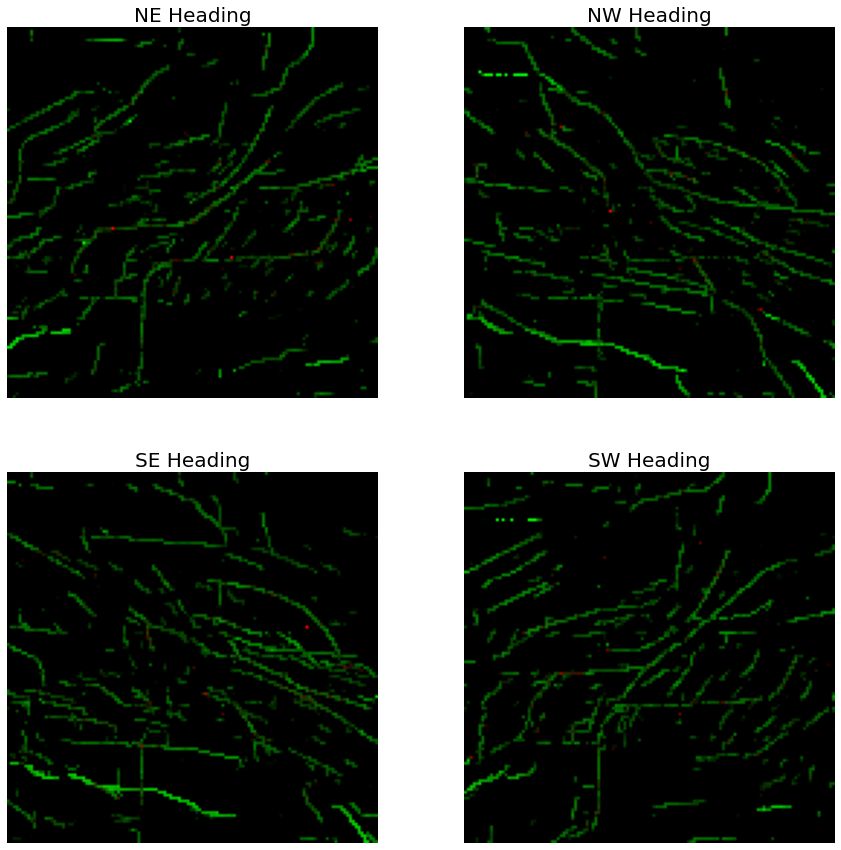

In [6]:
i=0
plotter = RGBMapPlotter(data1[13+3*i:16+3*i],1,i,"true")
plotter.plot_map()

# Build the model

In [7]:
# Load functions
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.nn import Linear, GRU, Conv2d, Dropout, MaxPool2d, BatchNorm1d, BatchNorm2d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

In [8]:
#use_cuda = torch.cuda.is_available()


use_cuda = False
print("Running GPU.") if use_cuda else print("No GPU available.")


def get_variable(x):
    """ Converts tensors to cuda, if available. """
    if use_cuda:
        return x.cuda()
    return x


def get_numpy(x):
    """ Get numpy array for both cuda and not. """
    if use_cuda:
        return x.cpu().data.numpy()
    return x.data.numpy()

No GPU available.


In [9]:
import torch.nn as nn
import torch



class ConvLSTMCell(nn.Module):

    def __init__(self, input_dim, hidden_dim, kernel_size, bias):
        """
        Initialize ConvLSTM cell.

        Parameters
        ----------
        input_dim: int
            Number of channels of input tensor.
        hidden_dim: int
            Number of channels of hidden state.
        kernel_size: (int, int)
            Size of the convolutional kernel.
        bias: bool
            Whether or not to add the bias.
        """

        super(ConvLSTMCell, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.kernel_size = kernel_size
        self.padding = kernel_size[0] // 2, kernel_size[1] // 2
        self.bias = bias

        self.conv = nn.Conv2d(in_channels=self.input_dim + self.hidden_dim,
                              out_channels=4 * self.hidden_dim,
                              kernel_size=self.kernel_size,
                              padding=self.padding,
                              bias=self.bias)

    def forward(self, input_tensor, cur_state):
        h_cur, c_cur = cur_state

        combined = torch.cat([input_tensor, h_cur], dim=1)  # concatenate along channel axis

        combined_conv = self.conv(combined)
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)
        i = torch.sigmoid(cc_i)
        f = torch.sigmoid(cc_f)
        o = torch.sigmoid(cc_o)
        g = torch.tanh(cc_g)

        c_next = f * c_cur + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

    def init_hidden(self, batch_size, image_size):
        height, width = image_size
        return (torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device),
                torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device))

In [10]:
INITIAL_CHANNEL = 8
height = 128
width = 128

features = INITIAL_CHANNEL*12

kernel_size =  3      # <-- Kernel size
conv_stride =  1      # <-- Stride
#conv_pad1    =  [0,0]    
#conv_pad2    =  [1,1] # <-- Padding
    
import torch
import torch.nn as nn
in_chan=INITIAL_CHANNEL
#nf=64
#from models.ConvLSTMCell import ConvLSTMCell
#based on https://towardsdatascience.com/video-prediction-using-convlstm-with-pytorch-lightning-27b195fd21a2
class Net(nn.Module):
    def __init__(self, nf, in_chan):
        super(Net, self).__init__()

        """ ARCHITECTURE 

        # Encoder (ConvLSTM)
        # Encoder Vector (final hidden state of encoder)
        # Decoder (ConvLSTM) - takes Encoder Vector as input
        # Decoder (3D CNN) - produces regression predictions for our model

        """
        self.encoder_1_convlstm = ConvLSTMCell(input_dim=in_chan,
                                               hidden_dim=nf,
                                               kernel_size=(3, 3),
                                               bias=True)

        self.encoder_2_convlstm = ConvLSTMCell(input_dim=nf,
                                               hidden_dim=nf,
                                               kernel_size=(3, 3),
                                               bias=True)

        self.decoder_1_convlstm = ConvLSTMCell(input_dim=nf,  # nf + 1
                                               hidden_dim=nf,
                                               kernel_size=(3, 3),
                                               bias=True)

        self.decoder_2_convlstm = ConvLSTMCell(input_dim=nf,
                                               hidden_dim=nf,
                                               kernel_size=(3, 3),
                                               bias=True)

        self.decoder_CNN = nn.Conv3d(in_channels=nf,
                                     out_channels=1,
                                     kernel_size=(1, 3, 3),
                                     padding=(0, 1, 1))
        self.decoder_CNN_2=nn.Conv3d(in_channels=nf,
                                     out_channels=1,
                                     kernel_size=(1, 3, 3),
                                     padding=(0, 1, 1))
        self.bn1 =nn.BatchNorm2d(nf)


    def autoencoder(self, x, seq_len, future_step, h_t, c_t, h_t2, c_t2, h_t3, c_t3, h_t4, c_t4):

        outputs = []
    
        # encoder
        for t in range(seq_len):
            h_t, c_t = self.encoder_1_convlstm(input_tensor=x[:, t, :, :],
                                               cur_state=[h_t, c_t])  # we could concat to provide skip conn here
            h_t=relu(self.bn1(h_t))
            h_t2, c_t2 = self.encoder_2_convlstm(input_tensor=h_t,
                                                 cur_state=[h_t2, c_t2])  # we could concat to provide skip conn here
        print(h_t2.shape,"c_t2",c_t2.shape)
        # encoder_vector
        h_t2=relu(self.bn1(h_t2))
        encoder_vector = h_t2
        print("encoder",encoder_vector.shape)
        # decoder
        for t in range(future_step):
            h_t3, c_t3 = self.decoder_1_convlstm(input_tensor=encoder_vector,
                                                 cur_state=[h_t3, c_t3])  # we could concat to provide skip conn here
            h_t3=relu(self.bn1(h_t3))
            h_t4, c_t4 = self.decoder_2_convlstm(input_tensor=h_t3,
                                                 cur_state=[h_t4, c_t4])  # we could concat to provide skip conn here
            h_t4=relu(self.bn1(h_t4))
            encoder_vector = h_t4
            outputs += [h_t4]  # predictions
        
        outputs = torch.stack(outputs, 1)
        print("outputs1",outputs.shape)
        outputs = outputs.permute(0, 2, 1, 3, 4)
        print("outputs2",outputs.shape)
        outputs = self.decoder_CNN(outputs)
#         print("outputs3",outputs.shape)
#         outputs = outputs.permute(0, 2, 1, 3, 4)
#         print("outputs4",outputs.shape,nf)
#         outputs =self.decoder_CNN_2(outputs)
#         print("outputs5",outputs.shape)
#         outputs = outputs.permute(0, 2, 1, 3, 4)
#         print("outputs4",outputs.shape)
#         outputs = torch.nn.Sigmoid()(outputs)
        outputs =relu(outputs)
        return outputs

    def forward(self, x, future_seq=1, hidden_state=None):

        """
        Parameters
        ----------
        input_tensor:
            5-D Tensor of shape (b, t, c, h, w)        #   batch, time, channel, height, width
        """

        # find size of different input dimensions
        b, seq_len, _, h, w = x.size()
        # initialize hidden states
        h_t, c_t = self.encoder_1_convlstm.init_hidden(batch_size=b, image_size=(h, w))
        h_t2, c_t2 = self.encoder_2_convlstm.init_hidden(batch_size=b, image_size=(h, w))
        h_t3, c_t3 = self.decoder_1_convlstm.init_hidden(batch_size=b, image_size=(h, w))
        h_t4, c_t4 = self.decoder_2_convlstm.init_hidden(batch_size=b, image_size=(h, w))

        # autoencoder forward
        outputs = self.autoencoder(x, seq_len, future_seq, h_t, c_t, h_t2, c_t2, h_t3, c_t3, h_t4, c_t4)
        
        return outputs
net = Net(8,8)
# if use_cuda:
#     net.cuda()
print(net)

Net(
  (encoder_1_convlstm): ConvLSTMCell(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (encoder_2_convlstm): ConvLSTMCell(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (decoder_1_convlstm): ConvLSTMCell(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (decoder_2_convlstm): ConvLSTMCell(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (decoder_CNN): Conv3d(8, 1, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1))
  (decoder_CNN_2): Conv3d(8, 1, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [11]:
m = nn.Conv3d(16, 33, 3, stride=2)
>>> # non-square kernels and unequal stride and with padding
>>> m = nn.Conv3d(16, 33, (3, 5, 2), stride=(2, 1, 1), padding=(4, 2, 0))
>>> input = torch.randn(20, 16, 10, 50, 100)
print(input.shape)
>>> output = m(input)
print(output.shape)

torch.Size([20, 16, 10, 50, 100])
torch.Size([20, 33, 8, 50, 99])


# Build the cost function

## Exercise 8
8.1) Since this is a classification task we will use the cross-entropy loss. Define the cross-entropy loss as the loss function in the code below.

In [12]:
LEARNING_RATE = 0.01
#criterion = nn.CrossEntropyLoss()    #<-- Your code here.   
criterion = torch.nn.MSELoss()
# weight_decay is equal to L2 regularization
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE, weight_decay=0.0)

def accuracy(ys, ts):
    predictions = torch.max(ys, 1)[1]
    correct_prediction = torch.eq(predictions, ts)
    return torch.mean(correct_prediction.float())

## Test network




In [13]:
for i, batch_train in enumerate(data_train.get_train_new_LSTM()):
    print(batch_train[0].shape)
    output = net(batch_train[0],8,8)
    print(output.shape)
    print(batch_train[1].shape)
    #data_test.plot(output['out'])
    break

This is the 1th batch in training
torch.Size([30, 12, 8, 128, 128])
torch.Size([30, 8, 128, 128]) c_t2 torch.Size([30, 8, 128, 128])
encoder torch.Size([30, 8, 128, 128])
outputs1 torch.Size([30, 8, 8, 128, 128])
outputs2 torch.Size([30, 8, 8, 128, 128])
torch.Size([30, 1, 8, 128, 128])
torch.Size([30, 3, 8, 128, 128])


In [14]:
print(output.shape)

torch.Size([30, 1, 8, 128, 128])


In [15]:
for i, batch_train in enumerate(data_valid.gen_valid()):
    print(batch_train[0].shape)

This is the 1th batch in validation
torch.Size([20, 96, 128, 128])


# Train

<Figure size 864x288 with 0 Axes>

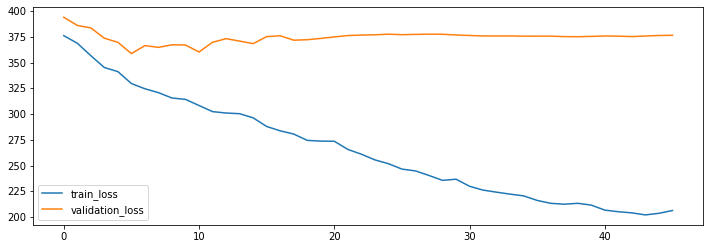

This is the 92th batch in training
torch.Size([30, 8, 128, 128]) c_t2 torch.Size([30, 8, 128, 128])
encoder torch.Size([30, 8, 128, 128])


KeyboardInterrupt: 

In [16]:
# Setup settings for training 
VALIDATION_SIZE = 0.1 # 0.1 is ~ 100 samples for validation
max_iter = 200
log_every = 2
eval_every = 2

# Initialize lists for training and validation
train_iter = []
train_loss, train_accs = [], []
valid_iter = []
valid_loss, valid_accs = [], []

# Train network
net.train()
for i, batch_train in enumerate(data_train.get_train_new_LSTM()):
    
    # Do the validaiton
    if i % eval_every == 0:
        net.eval()
        val_losses, val_accs, val_lengths = 0, 0, 0
        for j,batch_valid in enumerate(data_valid.gen_valid_LSTM()):
            output = net(batch_valid[0],8,8)
            val_losses += criterion(output, batch_valid[1])# * num
            break

        print("validation loss", val_losses)
        valid_loss.append(get_numpy(val_losses))
        valid_iter.append(i)
#         print("Valid, it: {} loss: {:.2f} accs: {:.2f}\n".format(i, valid_loss[-1], valid_accs[-1]))
        net.train()
    
#    Train network
#    print(batch_train[0].shape,batch_train[1].shape)
    optimizer.zero_grad()
    output = net(batch_train[0],8,8)
#    print(output['out'].shape)
#    true_train = batch_train[1].reshape(output['out'].shape)  
#    print(true_train.shape)
    batch_loss = criterion(output, batch_train[1])
    print("training loss",batch_loss)
    train_iter.append(i)
    train_loss.append(float(get_numpy(batch_loss)))  
#    train_accs.append(float(get_numpy(accuracy(output['out'], labels_argmax))))
    
    batch_loss.backward()
    optimizer.step()
    
    fig = plt.figure(figsize=(12,4))
    #plt.subplot(1, 2, 1)
    if i % log_every == 0:
        clear_output(wait=True)
        plt.plot(train_loss[::2], label='train_loss')
        plt.plot(valid_loss, label='validation_loss')
    #plt.plot(valid_iter, valid_accs, label='valid_accs')
        plt.legend()
        plt.show() 
        
    if max_iter < i:
        break
        
